In [1]:
import pandas as pd

df = pd.read_csv('CTA_-_Ridership_-_Daily_Boarding_Totals.csv')

In [2]:
df.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


In [3]:
df.columns = ['date', 'day_type', 'bus', 'rail', 'total']
df.head()

,date,day_type,bus,rail,total
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


In [4]:
df = df.sort_values('date').set_index('date')
df.head()

,day_type,bus,rail,total
date,,,,
01/01/2001,U,297192,126455,423647
01/01/2002,U,294360,122471,416831
01/01/2003,U,325478,169985,495463
01/01/2004,U,300347,174003,474350
01/01/2005,U,334140,196267,530407


In [5]:
df.drop(labels=['total'], inplace=True, axis=1)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(7974, 3)

In [15]:
df_mulvar = df[['bus', 'rail']]/1e6
df_mulvar['next_day_type'] = df['day_type'].shift(-1)
df_mulvar.head()

,bus,rail,next_day_type
date,,,
01/01/2001,0.297192,0.126455,U
01/01/2002,0.294360,0.122471,U
01/01/2003,0.325478,0.169985,U
01/01/2004,0.300347,0.174003,U
01/01/2005,0.334140,0.196267,U


In [16]:
df_mulvar = pd.get_dummies(df_mulvar)
df_mulvar.head()

,bus,rail,next_day_type_A,next_day_type_U,next_day_type_W
date,,,,,
01/01/2001,0.297192,0.126455,0,1,0
01/01/2002,0.294360,0.122471,0,1,0
01/01/2003,0.325478,0.169985,0,1,0
01/01/2004,0.300347,0.174003,0,1,0
01/01/2005,0.334140,0.196267,0,1,0


<AxesSubplot: xlabel='date'>

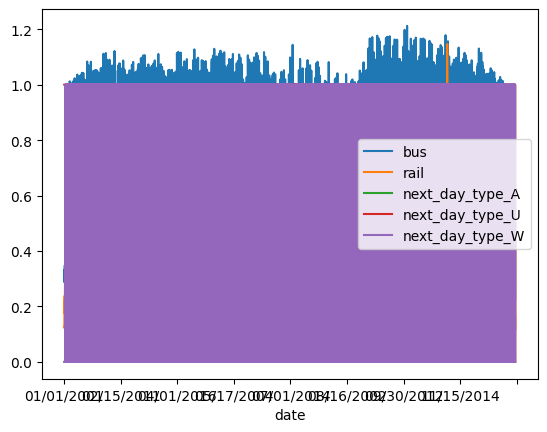

In [17]:
df_mulvar.plot()